In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
import objFuncs
from objFuncs import VM
from objFuncs import objFuncGoals
from objFuncs.util import plot_obj_history, plot_time_val
from objFuncs import construct_machineIO

objFuncs version: 1.0.3. updated on 2024-03-11
flame_utils is not importable. ignoreing this feature...


In [3]:
from pyBO import pyBO
from pyBO.util import proximal_ordered_init_sampler

pyBO version: 1.0.1. updated on 2024-03-02


In [4]:
ndim = 4
virtual_machine_evaluation_time_cost = 1
n_init = 10

# construct Virtual Machine Objective

In [5]:
decision_CSETs = ['x'+str(i) for i in range(ndim)]
decision_min = -2
decision_max =  2
objective_goal   = {'y' : 1.0}
objective_weight = {'y' : 1.0}
objective_norm   = {'y' : 1.0}

In [6]:
vm = VM(
        x0 = np.zeros(len(decision_CSETs)),
        decision_CSETs = decision_CSETs,
        decision_min = decision_min,
        decision_max = decision_max,
        objective_RDs = ['y'],
        objective_RDs_mean = [0],
        objective_RDs_std  = [1],
        )

In [7]:
machineIO = construct_machineIO()
machineIO._ensure_set = vm.ensure_set
machineIO._fetch_data = vm.fetch_data
machineIO._caget      = vm.caget
machineIO._caput      = vm.caput
machineIO._test       = True

In [8]:
obj = objFuncGoals(  
    decision_CSETs = decision_CSETs,
    decision_min = decision_min,
    decision_max = decision_max,
    objective_goal = objective_goal,
    objective_weight = objective_weight,
    objective_norm = objective_norm,
    machineIO = machineIO,
    )

======== class info ========
init_time: 2024-03-14 15:33:40.587367
class_hierarchy: [
    objFuncGoals, objFuncBase]
machineIO: not picklable
decision_CSETs: [
    x0, x1, x2
    x3]
decision_min: [-2. -2. -2. -2.]
decision_max: [2. 2. 2. 2.]
decision_bounds: [[-2.  2.]
 [-2.  2.]
 [-2.  2.]
 [-2.  2.]]
decision_RDs: [
    x0, x1, x2
    x3]
decision_tols: None
decision_couplings: None
history_buffer_size: None
logging_frequency: inf
logging_tag: 
logging_fname: None
x0: [
    0.0, 0.0, 0.0
    0.0]
objective_weight: {'y': 1.0}
objective_goal: {'y': 1.0}
objective_norm: {'y': 1.0}
objective_RDs: [
    y]
objective_p_order: 2
apply_bilog: False



In [9]:
plot_RDs = plot_time_val(history=machineIO.history,
                         keys = [decision_CSETs, ['y']])
plot_objs = plot_obj_history(
            obj.history['objectives'],
            keys=[['y']],
            add_y_data = obj.history['objectives']['total'],
            add_y_label = 'total obj'
            )
callbacks = [plot_RDs, plot_objs]
def obj_callbacks(x):
    y = obj(x,callbacks=callbacks)
    time.sleep(virtual_machine_evaluation_time_cost)
    return y

# runBO

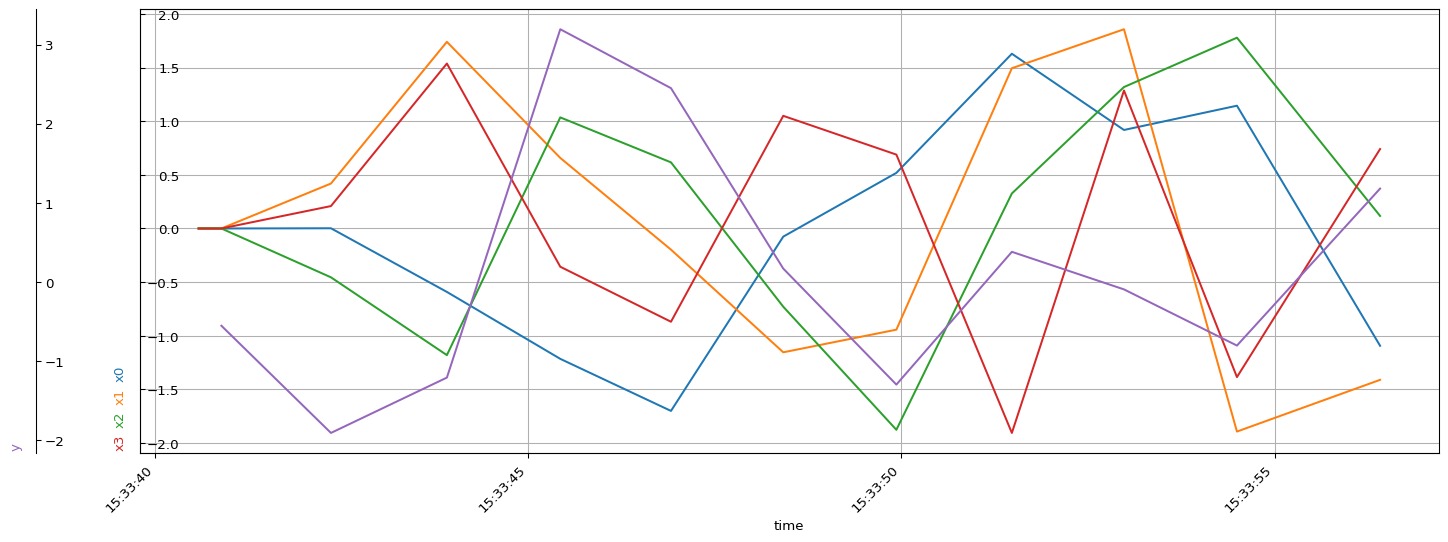

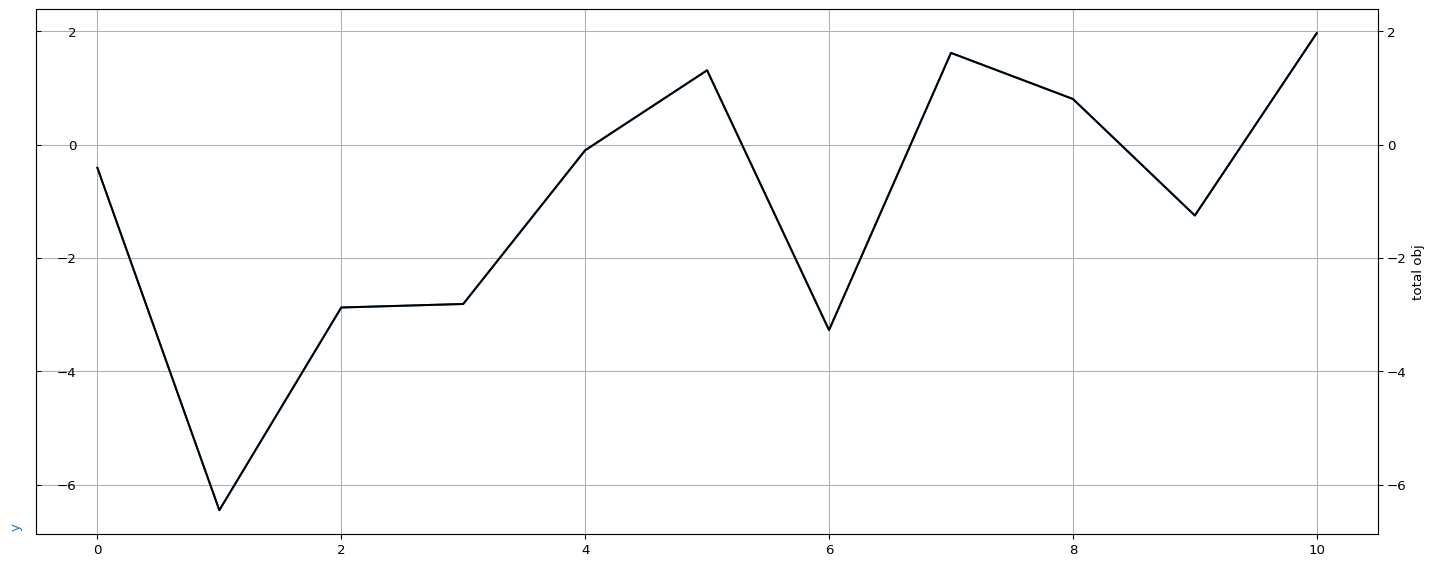

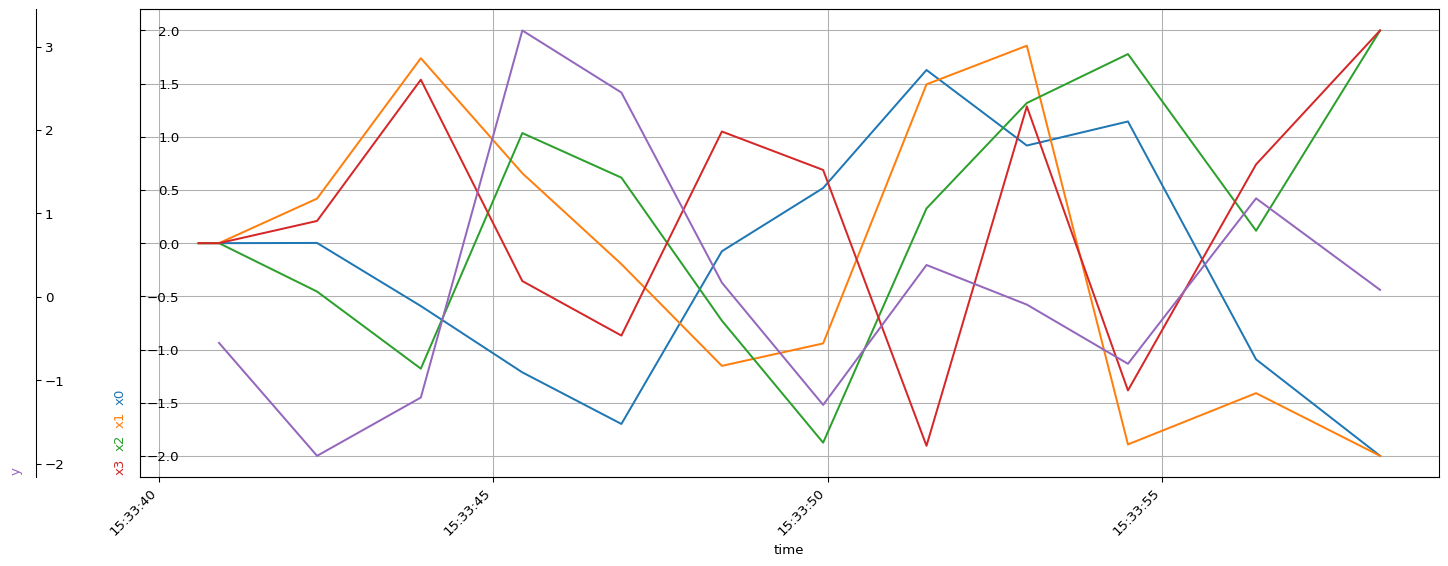

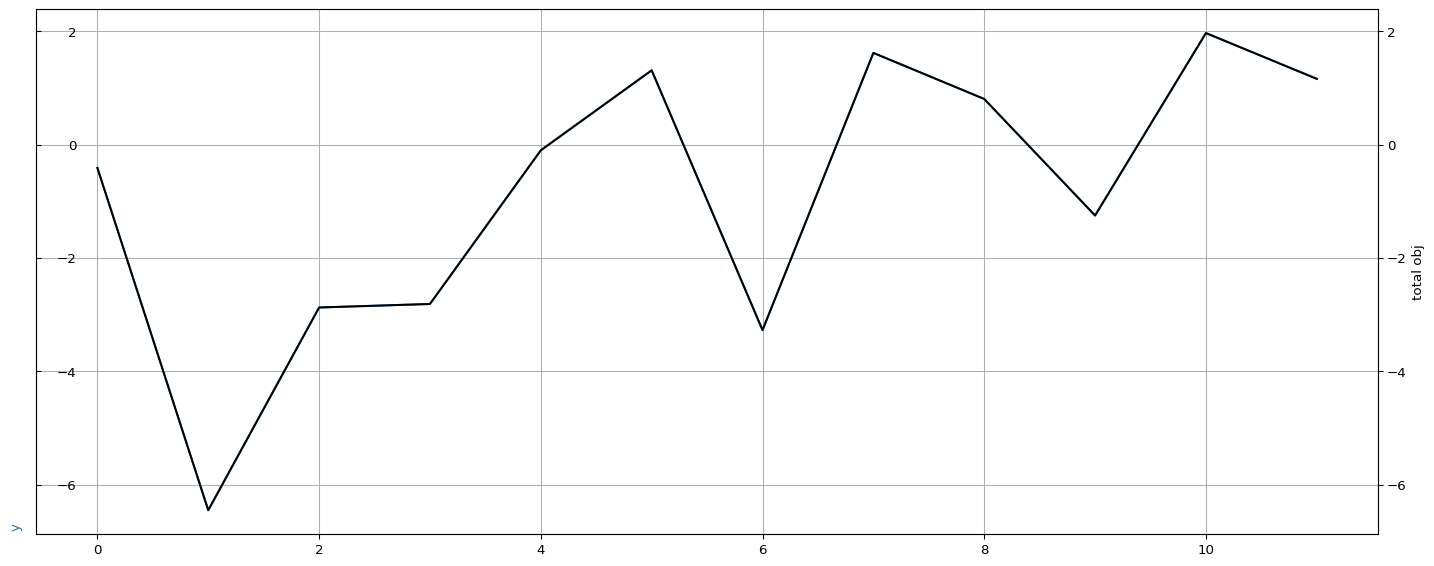

In [10]:
bo, X_pending, Y_pending_future = pyBO.runBO(
                                            obj_callbacks,  
                                            bounds = obj.decision_bounds,
                                            n_init = n_init,
                                            budget = n_init+1,
                                            batch_size=1,
                                            )
for f in callbacks:
    f.close()
time.sleep(virtual_machine_evaluation_time_cost+1)
for f in callbacks:
    f.close()
time.sleep(virtual_machine_evaluation_time_cost+1)

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%



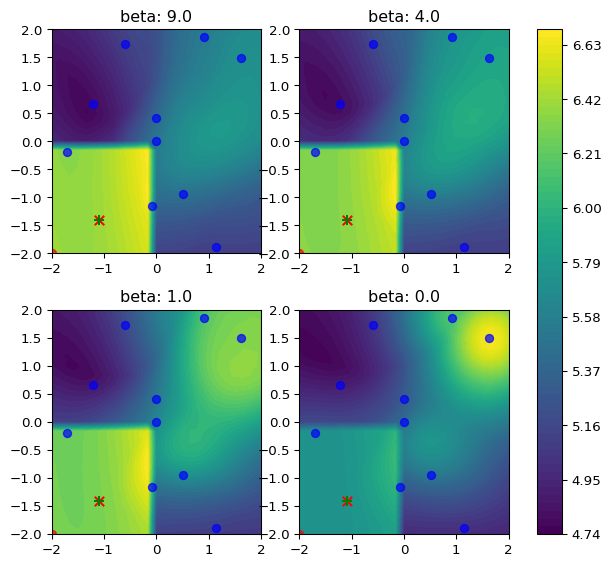

In [11]:
fig,ax = plt.subplots(2,2,figsize=(6.6,6),dpi=96)
cs = bo.plot_acquisition_2D_projection(
                                  epoch=-2,colorbar=False,fig=fig,ax=ax[0,0],acquisition_func_args={'beta':9})
bo.plot_acquisition_2D_projection(epoch=-2,colorbar=False,fig=fig,ax=ax[0,1],acquisition_func_args={'beta':4})
bo.plot_acquisition_2D_projection(epoch=-2,colorbar=False,fig=fig,ax=ax[1,0],acquisition_func_args={'beta':1})
bo.plot_acquisition_2D_projection(epoch=-2,colorbar=False,fig=fig,ax=ax[1,1],acquisition_func_args={'beta':0})
for i in range(2):
    for j in range(2):
        ax[i,j].get_legend().remove()
ax[0,0].set_title('beta: 9.0')
ax[0,1].set_title('beta: 4.0')
ax[1,0].set_title('beta: 1.0')
ax[1,1].set_title('beta: 0.0')
        
fig.tight_layout()
fig.colorbar(cs,ax=ax)

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%



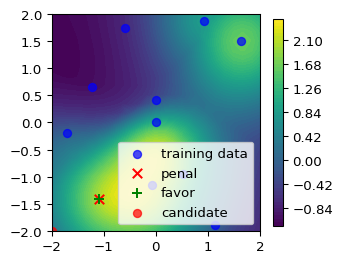

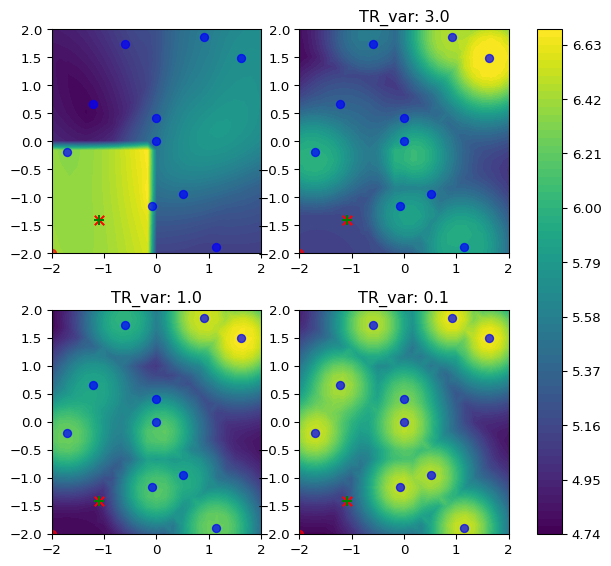

In [12]:
bo.plot_model_2D_projection(epoch=-2)

fig,ax = plt.subplots(2,2,figsize=(6.6,6),dpi=96)
cs = bo.plot_acquisition_2D_projection(
                                  epoch=-2,colorbar=False,fig=fig,ax=ax[0,0],acquisition_func_args={'beta':9})
bo.plot_acquisition_2D_projection(epoch=-2,colorbar=False,fig=fig,ax=ax[0,1],acquisition_func_args={'beta':9,'TR_var':3})
bo.plot_acquisition_2D_projection(epoch=-2,colorbar=False,fig=fig,ax=ax[1,0],acquisition_func_args={'beta':9,'TR_var':1})
bo.plot_acquisition_2D_projection(epoch=-2,colorbar=False,fig=fig,ax=ax[1,1],acquisition_func_args={'beta':9,'TR_var':0.1})
for i in range(2):
    for j in range(2):
        ax[i,j].get_legend().remove()
ax[0,1].set_title('TR_var: 3.0')
ax[1,0].set_title('TR_var: 1.0')
ax[1,1].set_title('TR_var: 0.1')
        
fig.tight_layout()
fig.colorbar(cs,ax=ax)

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%



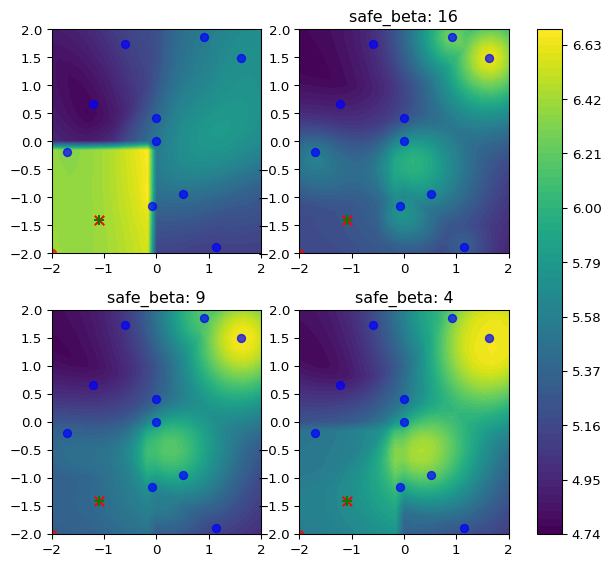

In [13]:
fig,ax = plt.subplots(2,2,figsize=(6.6,6),dpi=96)
cs = bo.plot_acquisition_2D_projection(
                                  epoch=-2,colorbar=False,fig=fig,ax=ax[0,0],acquisition_func_args={'beta':9})
bo.plot_acquisition_2D_projection(epoch=-2,colorbar=False,fig=fig,ax=ax[0,1],acquisition_func_args={'beta':9,'safe_beta':16})
bo.plot_acquisition_2D_projection(epoch=-2,colorbar=False,fig=fig,ax=ax[1,0],acquisition_func_args={'beta':9,'safe_beta':9})
bo.plot_acquisition_2D_projection(epoch=-2,colorbar=False,fig=fig,ax=ax[1,1],acquisition_func_args={'beta':9,'safe_beta':4})
for i in range(2):
    for j in range(2):
        ax[i,j].get_legend().remove()
ax[0,1].set_title('safe_beta: 16')
ax[1,0].set_title('safe_beta: 9')
ax[1,1].set_title('safe_beta: 4')
        
fig.tight_layout()
fig.colorbar(cs,ax=ax)

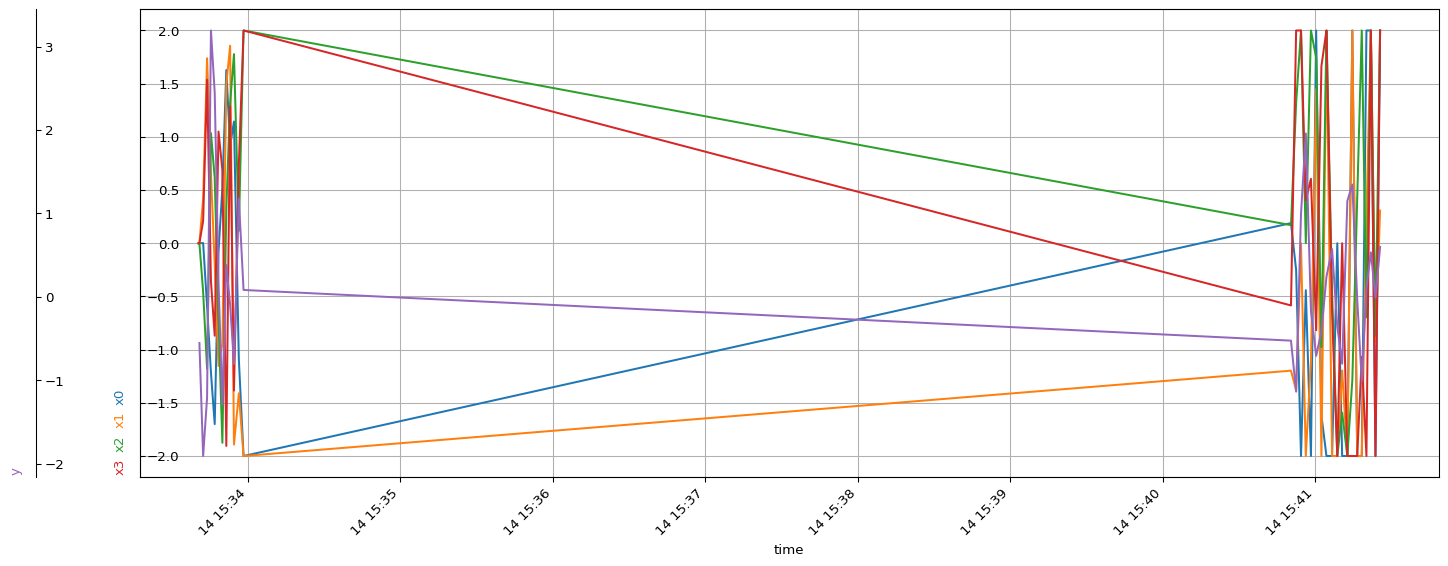

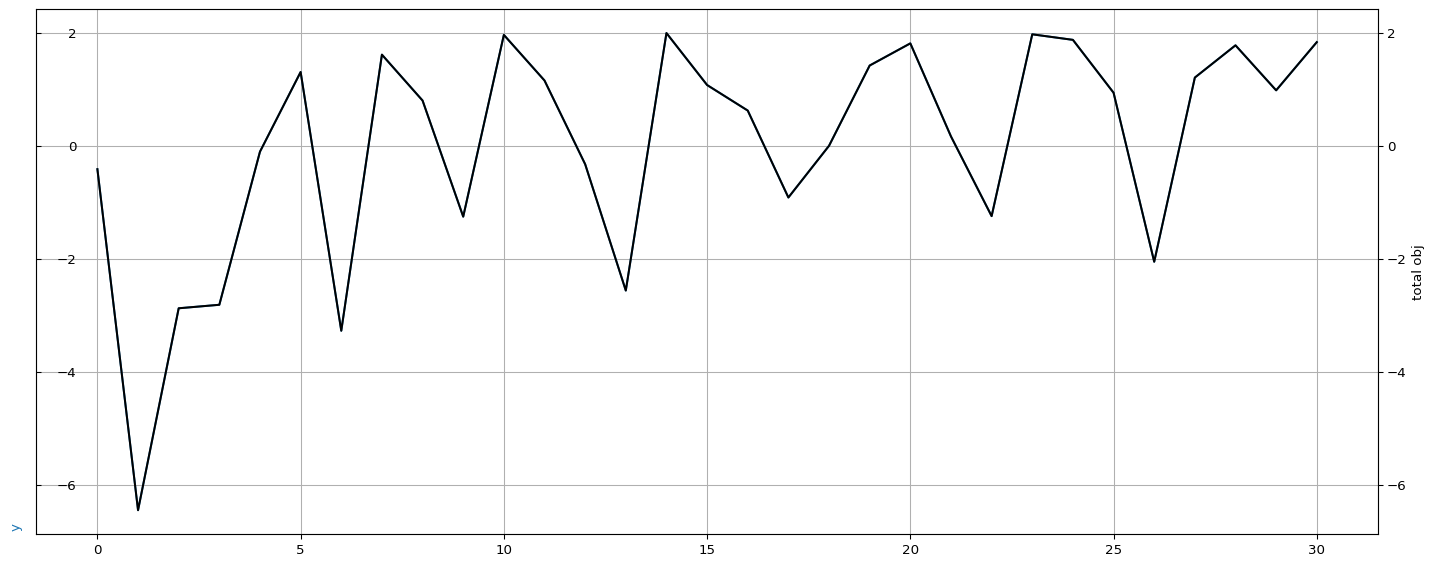

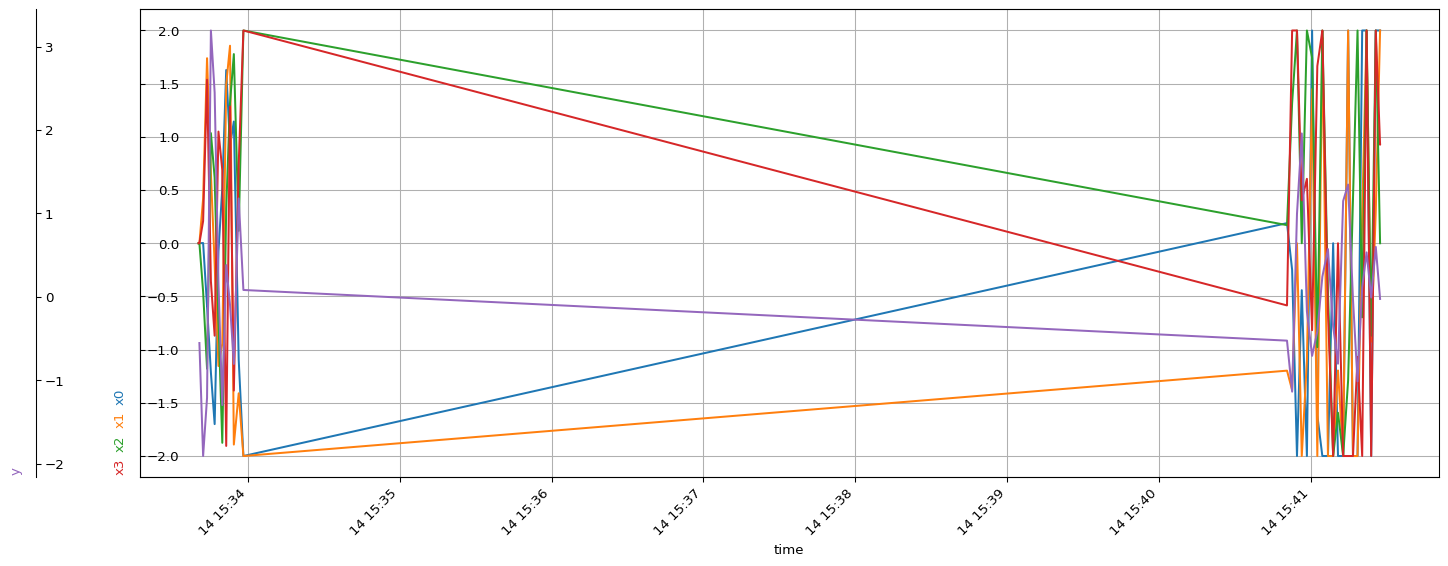

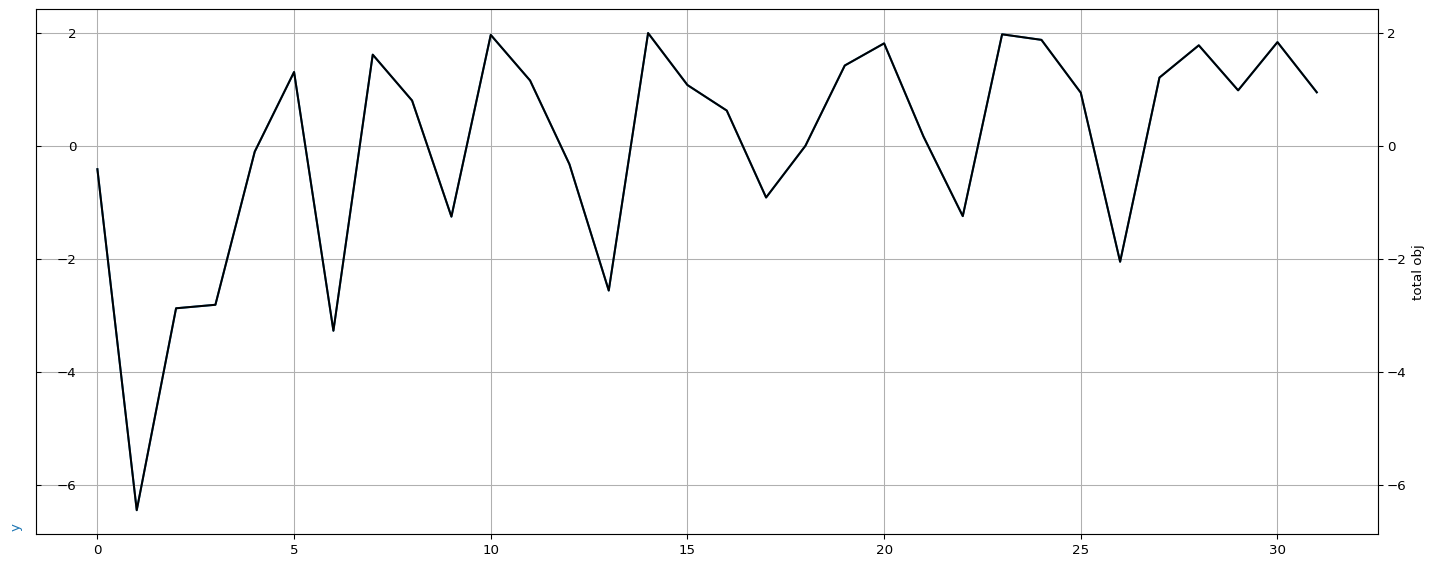

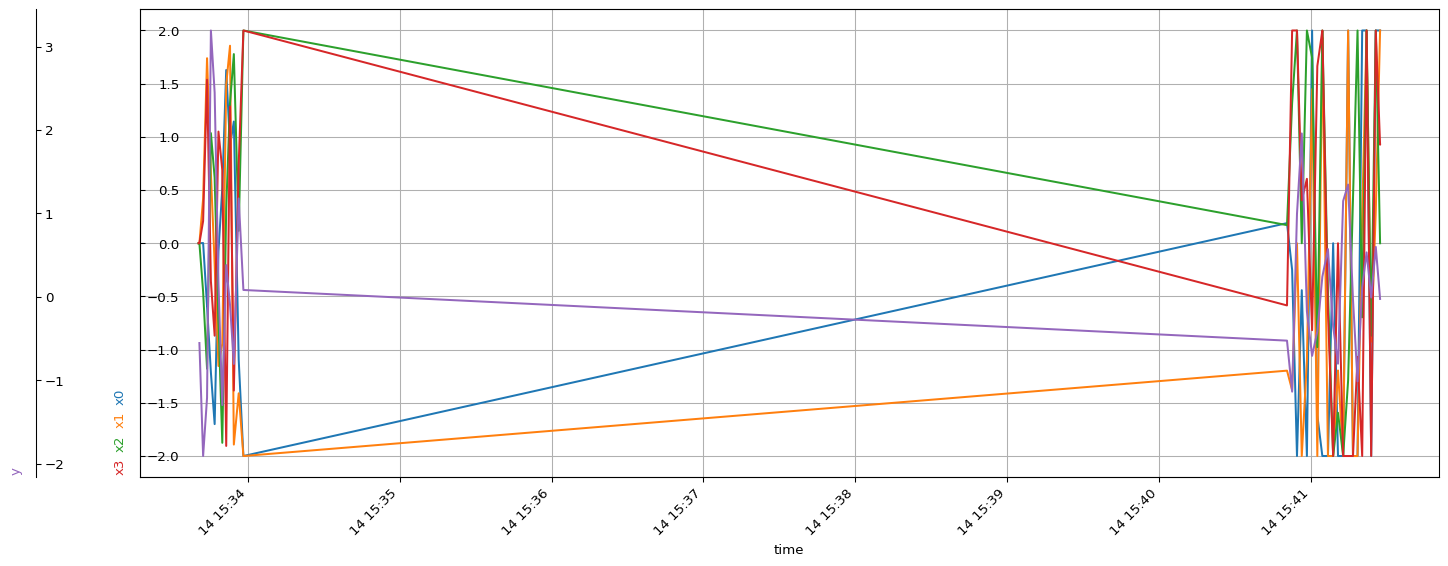

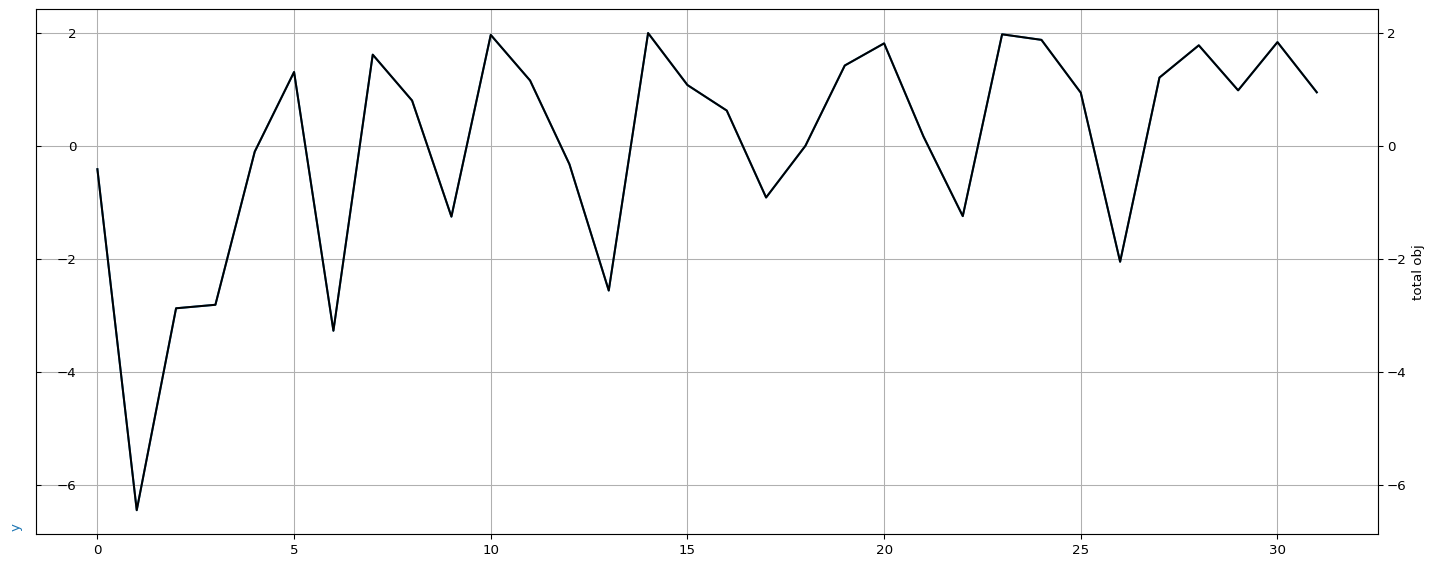

In [14]:
X_pending, Y_pending_future= bo.loop( 
                                    n_loop = 20,  # number of additional optimization interation
                                    func_obj = obj_callbacks,
                                    X_pending = X_pending, 
                                    Y_pending_future = Y_pending_future,
                                    batch_size = 1,
                                    )

for f in callbacks:
    f.close()
time.sleep(virtual_machine_evaluation_time_cost+1)

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%



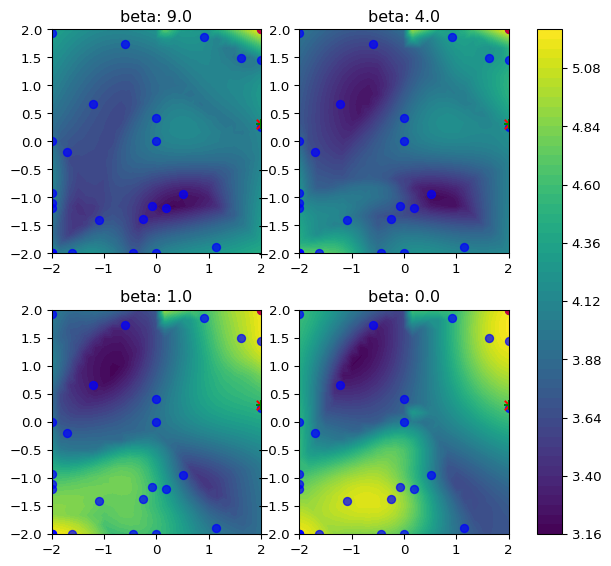

In [15]:
fig,ax = plt.subplots(2,2,figsize=(6.6,6),dpi=96)
cs = bo.plot_acquisition_2D_projection(
                                  epoch=-2,colorbar=False,fig=fig,ax=ax[0,0],acquisition_func_args={'beta':9})
bo.plot_acquisition_2D_projection(epoch=-2,colorbar=False,fig=fig,ax=ax[0,1],acquisition_func_args={'beta':4})
bo.plot_acquisition_2D_projection(epoch=-2,colorbar=False,fig=fig,ax=ax[1,0],acquisition_func_args={'beta':1})
bo.plot_acquisition_2D_projection(epoch=-2,colorbar=False,fig=fig,ax=ax[1,1],acquisition_func_args={'beta':0})
for i in range(2):
    for j in range(2):
        ax[i,j].get_legend().remove()
ax[0,0].set_title('beta: 9.0')
ax[0,1].set_title('beta: 4.0')
ax[1,0].set_title('beta: 1.0')
ax[1,1].set_title('beta: 0.0')
        
fig.tight_layout()
fig.colorbar(cs,ax=ax)

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%



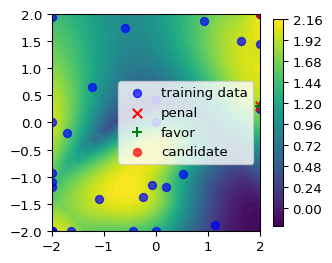

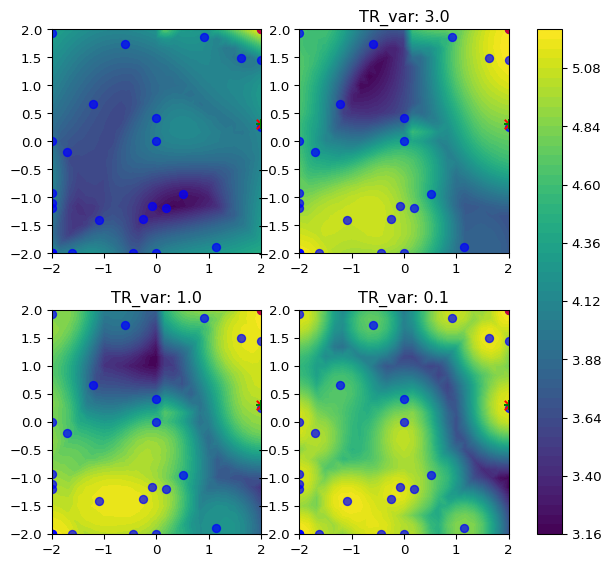

In [16]:
bo.plot_model_2D_projection(epoch=-2)

fig,ax = plt.subplots(2,2,figsize=(6.6,6),dpi=96)
cs = bo.plot_acquisition_2D_projection(
                                  epoch=-2,colorbar=False,fig=fig,ax=ax[0,0],acquisition_func_args={'beta':9})
bo.plot_acquisition_2D_projection(epoch=-2,colorbar=False,fig=fig,ax=ax[0,1],acquisition_func_args={'beta':9,'TR_var':3})
bo.plot_acquisition_2D_projection(epoch=-2,colorbar=False,fig=fig,ax=ax[1,0],acquisition_func_args={'beta':9,'TR_var':1})
bo.plot_acquisition_2D_projection(epoch=-2,colorbar=False,fig=fig,ax=ax[1,1],acquisition_func_args={'beta':9,'TR_var':0.1})
for i in range(2):
    for j in range(2):
        ax[i,j].get_legend().remove()
ax[0,1].set_title('TR_var: 3.0')
ax[1,0].set_title('TR_var: 1.0')
ax[1,1].set_title('TR_var: 0.1')
        
fig.tight_layout()
fig.colorbar(cs,ax=ax)

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%



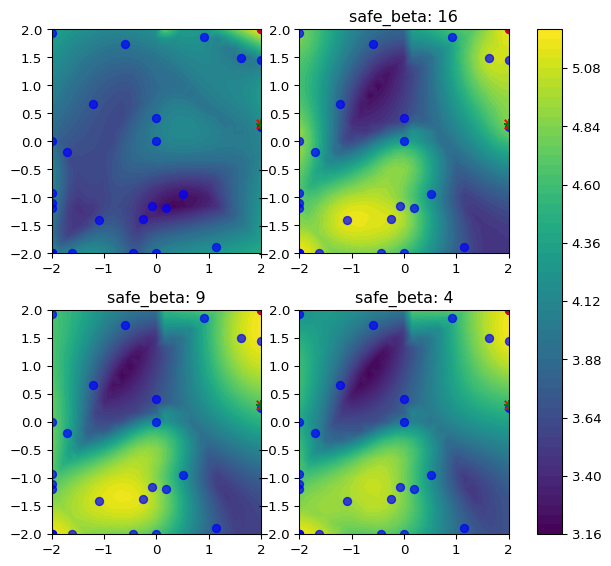

In [17]:
fig,ax = plt.subplots(2,2,figsize=(6.6,6),dpi=96)
cs = bo.plot_acquisition_2D_projection(
                                  epoch=-2,colorbar=False,fig=fig,ax=ax[0,0],acquisition_func_args={'beta':9})
bo.plot_acquisition_2D_projection(epoch=-2,colorbar=False,fig=fig,ax=ax[0,1],acquisition_func_args={'beta':9,'safe_beta':16})
bo.plot_acquisition_2D_projection(epoch=-2,colorbar=False,fig=fig,ax=ax[1,0],acquisition_func_args={'beta':9,'safe_beta':9})
bo.plot_acquisition_2D_projection(epoch=-2,colorbar=False,fig=fig,ax=ax[1,1],acquisition_func_args={'beta':9,'safe_beta':4})
for i in range(2):
    for j in range(2):
        ax[i,j].get_legend().remove()
ax[0,1].set_title('safe_beta: 16')
ax[1,0].set_title('safe_beta: 9')
ax[1,1].set_title('safe_beta: 4')
        
fig.tight_layout()
fig.colorbar(cs,ax=ax)